## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [21]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [7]:
X = df.drop(columns = ['median_house_value']).copy()
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  int64  
 9   ocean_proximity_ISLAND      20640 non-null  int64  
 10  ocean_proximity_NEAR BAY    20640 non-null  int64  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.9 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [8]:
y =  df.loc[:,'median_house_value']

y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [10]:
regr_2 = DecisionTreeRegressor(max_depth=8)

In [11]:
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [12]:
mse2 = regr_2.score(X_train, y_train)

In [14]:
template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

In [15]:
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=8 é: 0,76


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [16]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.16602067e+02, 2.53229974e+02, 1.20187339e+03,
        9.89179587e+03, 1.89941860e+04, 3.73385013e+04, 7.55935078e+04,
        8.07525840e+04, 1.08487229e+05, 1.22806667e+05, 1.52016472e+05,
        1.81686047e+05, 2.30135926e+05, 2.63958656e+05, 2.69798557e+05,
        2.83581718e+05, 2.97949407e+05, 3.14386648e+05, 3.39115740e+05,
        4.00617733e+05, 4.08793605e+05, 4.34179580e+05, 4.39635372e+05,
        4.63500436e+05, 4.69612724e+05, 4.81443841e+05, 4.81698090e+05,
        5.52448934e+05, 5.83375144e+05, 6.02499887e+05, 6.05349160e+05,
        6.13848002e+05, 6.15339370e+05, 6.26744724e+05, 7.59818923e+05,
        7.72018669e+05, 7.91632935e+05, 8.14389406e+05, 8.20105931e+05,
        8.59595824e+05, 8.69918847e+05, 8.99554054e+05, 9.30581421e+05,
        9.46328063e+05, 1.00096301e+06, 1.02872389e+06, 1.10822189e+06,
        1.12789519e+06, 1.15872059e+06, 1.16634493e+06, 1.18848607e+06,
        1.19859250e+06, 1.20216146e+06, 1.25583908

Text(0, 0.5, 'Impureza total das folhas')

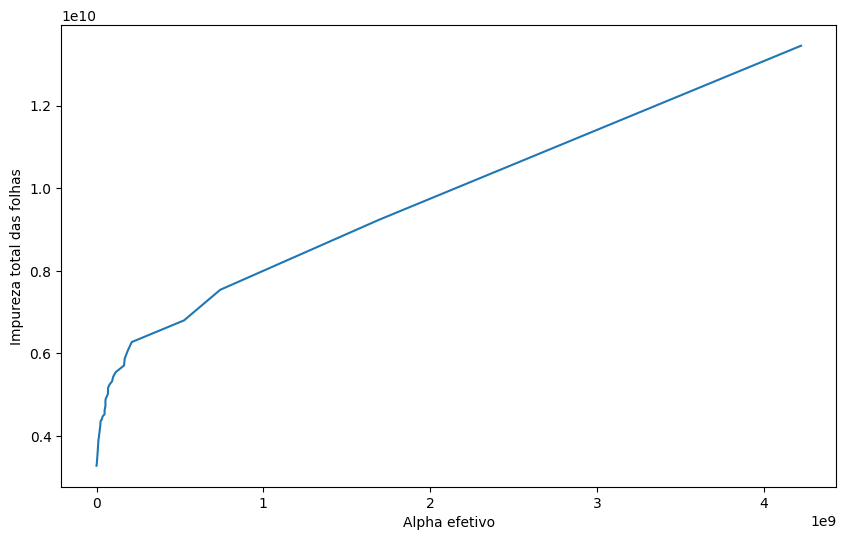

In [17]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

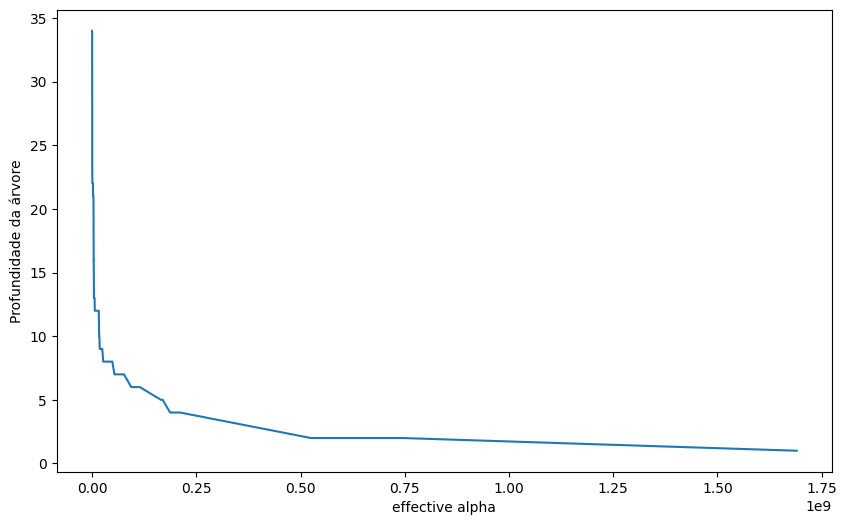

In [19]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [23]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

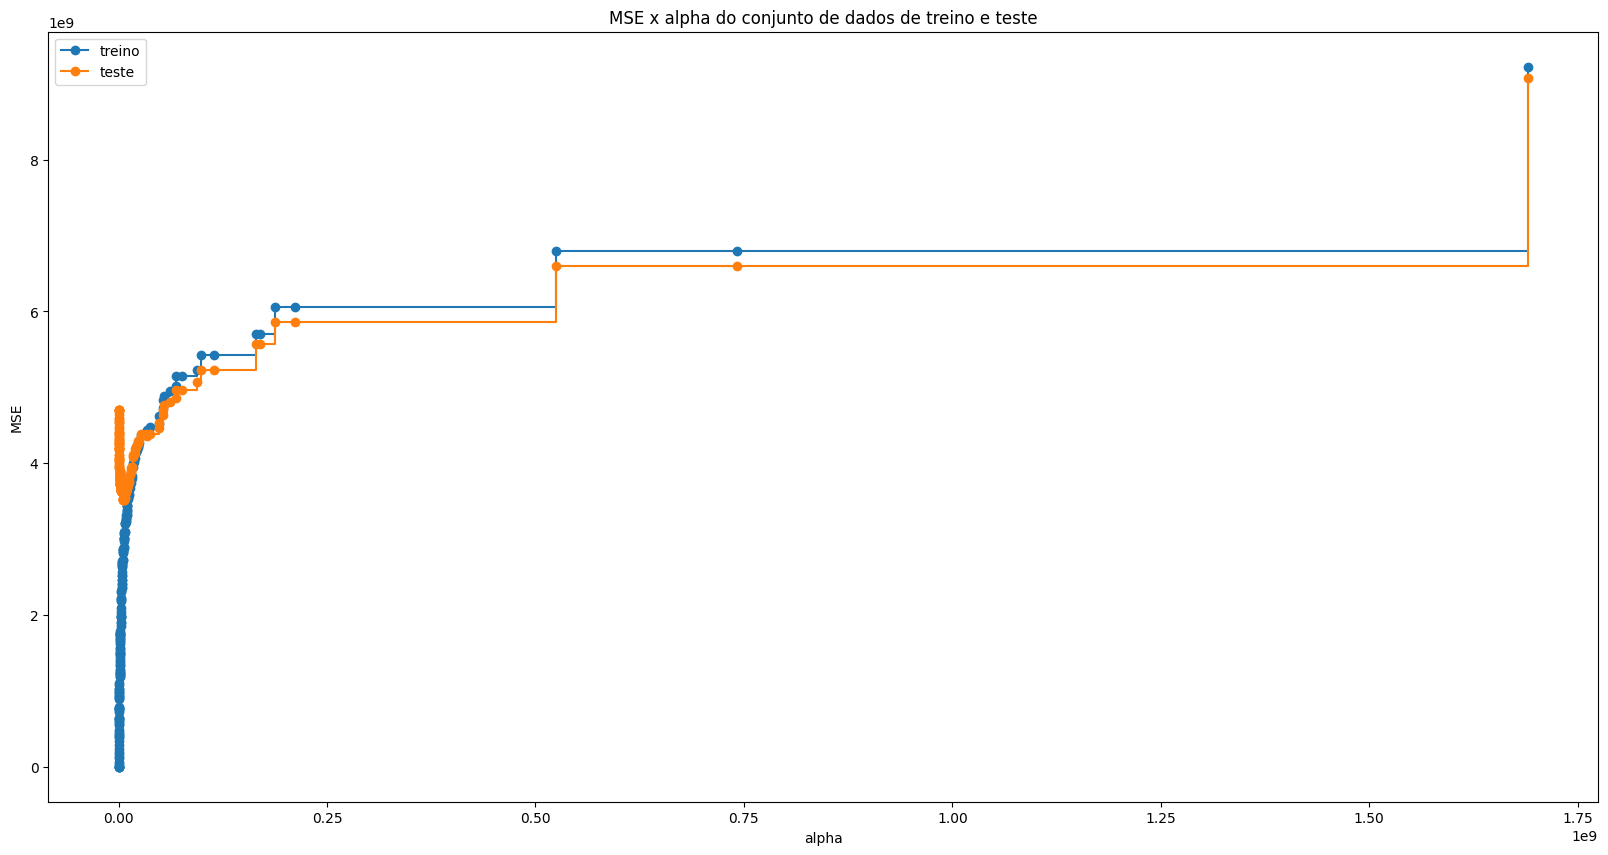

In [29]:


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [26]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.01)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE  na base de treino: {mean_squared_error(y_train, arvore_final.predict(X_train)):.2f}')
print(f'MSE  na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 34
R-quadrado na base de testes: 0.64
MSE  na base de treino: 816168.61
MSE  na base de testes: 4704785236.41


### 7. Visualize esta árvore.

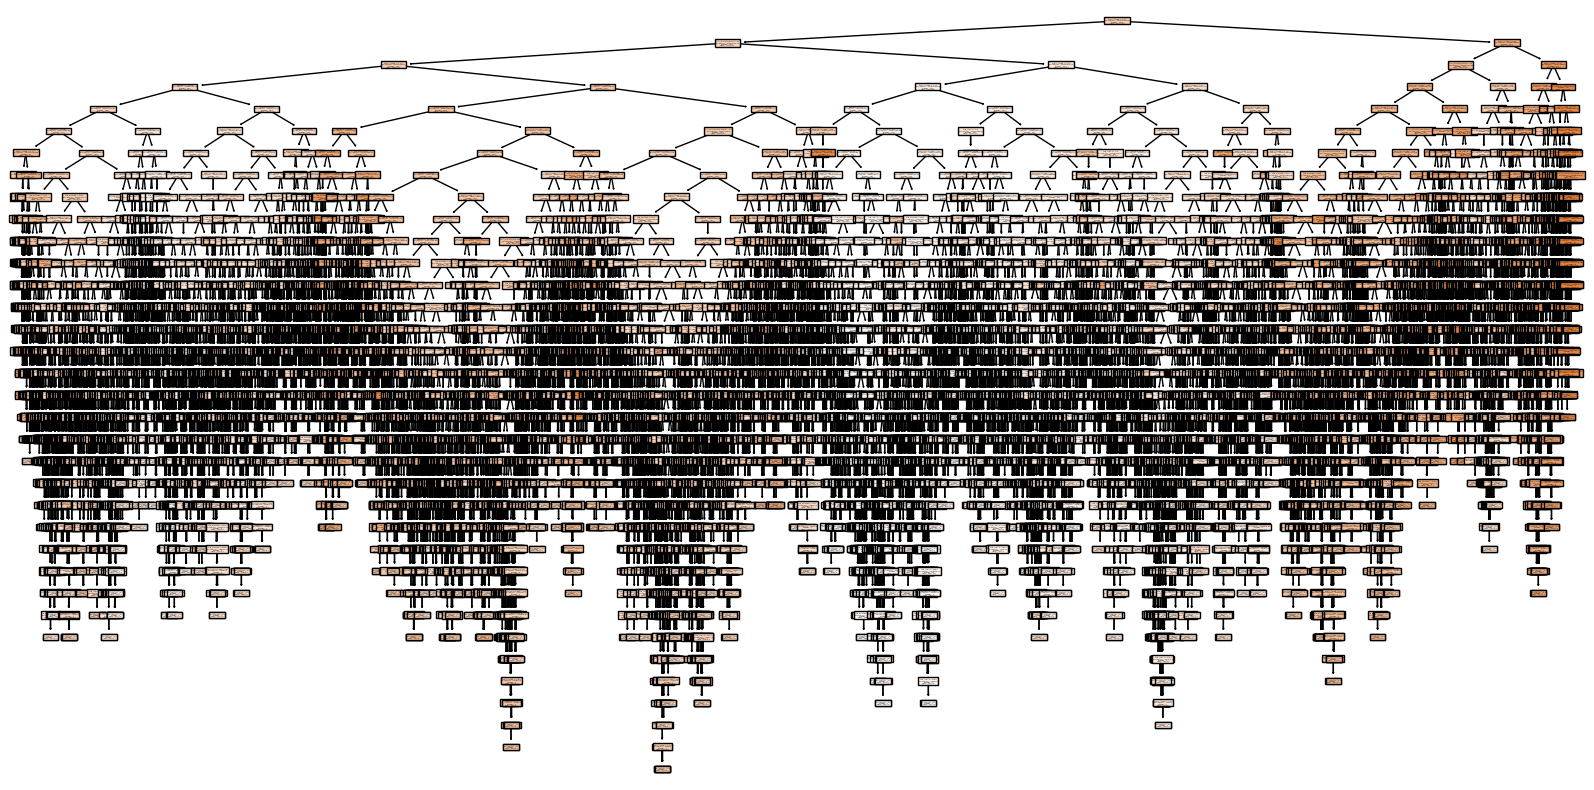

In [27]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(arvore_final,
                    feature_names=X.columns,
                    filled=True)